#Introduction

From the descriptive and inferential analyses conducted, we now have a better understanding of which features play a role in CO2 emission levels. Descriptive analyses identified engine size, cylinders, and fuel consumption in the city and on the highway. Hypothesis testing revealed sufficient evidence that vehicle size and fuel type have statistically different CO2 emission levels. These will be important features to include in our models to ensure highest prediction scores of the target, CO2 emissions.



#Data Loading and Processing

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#use pandas to read csv file

df = pd.read_csv('CO2 Emissions_Canada.csv')

In [3]:
#identify the number of null values in each column

df.isna().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


In [4]:
#some column names can be cleaned up
#the fuel type can be decoded using the dataset description csv

map = {'Z': 'Premium Gasoline', 'D': 'Diesel', 'X': 'Regular Gasoline', 'E': 'Ethanol (E85)', 'N': 'Natural Gas'}

df['Fuel Type']=df['Fuel Type'].map(map)

In [5]:
#see the distribution
df['Fuel Type'].value_counts()

#might want to remove the one natural gas row of data

,count
Fuel Type,
Regular Gasoline,3637
Premium Gasoline,3202
Ethanol (E85),370
Diesel,175
Natural Gas,1


In [6]:
df[df['Fuel Type']=='Natural Gas']

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,AS6,Natural Gas,15.2,9.5,12.7,22,213


In [7]:
#extract the number of gears in transmission

def extract_gears(transmission):
    import re #used chatGPT for assistance in portions of this part
    match = re.search(r'\d+', transmission)
    if match:
        return int(match.group(0))
    else:
        return None

df['Number of Gears'] = df['Transmission'].apply(extract_gears)

columns = list(df.columns)
columns.insert(6, columns.pop(columns.index('Number of Gears')))
df = df[columns]

In [8]:
df['Number of Gears'] = df['Number of Gears'].fillna('Unknown')

In [9]:
#vehicle class column could get a little messy
df['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [10]:
#let's condense it into a column named 'Size' and have three sizes: Small, Medium, and Large

def categorize_size(vehicle_class):
    size_mapping = {
        'COMPACT': 'Small',
        'MINICOMPACT': 'Small',
        'SUBCOMPACT': 'Small',
        'TWO-SEATER': 'Small',
        'STATION WAGON - SMALL': 'Small',
        'PICKUP TRUCK - SMALL': 'Small',

        'MID-SIZE': 'Medium',
        'SUV - SMALL': 'Medium',
        'STATION WAGON - MID-SIZE': 'Medium',
        'PICKUP TRUCK - STANDARD': 'Medium',

        'FULL-SIZE': 'Large',
        'SUV - STANDARD': 'Large',
        'VAN - CARGO': 'Large',
        'VAN - PASSENGER': 'Large',
        'MINIVAN': 'Large',
        'SPECIAL PURPOSE VEHICLE': 'Large'
    }
    return size_mapping.get(vehicle_class, 'Unknown')

df['Size'] = df['Vehicle Class'].apply(categorize_size)

cols = list(df.columns)
vehicle_class_index = 3  # 4th column (0-indexed)
cols.insert(vehicle_class_index, cols.pop(cols.index('Size')))

df=df[cols]

In [11]:
#final look at the dataframe
df

,Make,Model,Vehicle Class,Size,Engine Size(L),Cylinders,Transmission,Number of Gears,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,Small,2.0,4,AS5,5.0,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,Small,2.4,4,M6,6.0,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,Small,1.5,4,AV7,7.0,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,Medium,3.5,6,AS6,6.0,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,Medium,3.5,6,AS6,6.0,Premium Gasoline,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,Medium,2.0,4,AS8,8.0,Premium Gasoline,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,Medium,2.0,4,AS8,8.0,Premium Gasoline,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,Medium,2.0,4,AS8,8.0,Premium Gasoline,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,Large,2.0,4,AS8,8.0,Premium Gasoline,11.2,8.3,9.9,29,232


#Machine Learning Investigation

In [12]:
#import base machine learning models that might be used
#more specific importing may be required later on

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from numpy import mean, std

#selection imports
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split, RepeatedKFold, GridSearchCV

#machine learning models
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor

#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, explained_variance_score, r2_score, mean_squared_error, mean_absolute_error, classification_report, confusion_matrix, make_scorer
from sklearn.pipeline import Pipeline
from imblearn import over_sampling, under_sampling
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, auc
import warnings
warnings.filterwarnings("ignore")

In [13]:
df

,Make,Model,Vehicle Class,Size,Engine Size(L),Cylinders,Transmission,Number of Gears,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,Small,2.0,4,AS5,5.0,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,Small,2.4,4,M6,6.0,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,Small,1.5,4,AV7,7.0,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,Medium,3.5,6,AS6,6.0,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,Medium,3.5,6,AS6,6.0,Premium Gasoline,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,Medium,2.0,4,AS8,8.0,Premium Gasoline,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,Medium,2.0,4,AS8,8.0,Premium Gasoline,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,Medium,2.0,4,AS8,8.0,Premium Gasoline,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,Large,2.0,4,AS8,8.0,Premium Gasoline,11.2,8.3,9.9,29,232


#Data Preparation

In [14]:
#drop the columns that won't be needed for the models
try:
    df.drop(columns=["Make", "Model", "Vehicle Class", "Transmission"], inplace=True)
except:
    print("Positional features already imputed.")

In [15]:
#change important columns into numerical representations
if not pd.api.types.is_numeric_dtype(df['Size']):
    try:
        vehicle_size = {"Small": 0, "Medium": 1, "Large": 2}
        df["Size"] = df["Size"].map(vehicle_size)
        print("Size mapping applied successfully.")
    except Exception:
        print("Positional features already imputed.")

Size mapping applied successfully.


In [16]:
if not pd.api.types.is_numeric_dtype(df['Fuel Type']):
    try:
        fuel_type = {
            "Premium Gasoline": 0,
            "Diesel": 1,
            "Regular Gasoline": 2,
            "Ethanol (E85)": 3
        }
        df["Fuel Type"] = df["Fuel Type"].map(fuel_type)
        print("Fuel type mapping applied successfully.")
    except Exception:
        print("Positional features already imputed.")

Fuel type mapping applied successfully.


In [17]:
#looking at the original data, the one null value should be 2.0 aka Regular Gasoline
df['Fuel Type']=df['Fuel Type'].fillna('2')

#change row values to integers
df['Fuel Type']=df['Fuel Type'].astype(int)

#there are unknowns in "Number of Gears" which will affect the models
df = df[df['Number of Gears'] != 'Unknown']

In [18]:
df.head()

,Size,Engine Size(L),Cylinders,Number of Gears,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,2.0,4,5.0,0,9.9,6.7,8.5,33,196
1,0,2.4,4,6.0,0,11.2,7.7,9.6,29,221
2,0,1.5,4,7.0,0,6.0,5.8,5.9,48,136
3,1,3.5,6,6.0,0,12.7,9.1,11.1,25,255
4,1,3.5,6,6.0,0,12.1,8.7,10.6,27,244


---
---

In [19]:
def run_basic_regression(model_cls,
                         X_train,
                         X_test,
                         y_train,
                         y_test,
                         ):

    #initialize the model
    regressor = model_cls()

    #fit the model to the training data
    regressor.fit(X_train, y_train)

    #predict on the test set and training set
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    #calculate the Mean Squared Error and r-squared score for both training and test sets
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    #print the errors and r-squared scores
    print(f"Training MSE: {mse_train}")
    print(f"Test MSE: {mse_test}")
    print(f"Training R²: {r2_train}")
    print(f"Test R²: {r2_test}")

    #plot a visual

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.6, color='orange')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', lw=2, linestyle='--')
    plt.title('Actual vs Predicted CO2 Emissions')
    plt.xlabel('Actual CO2 Emissions (g/km)')
    plt.ylabel('Predicted CO2 Emissions (g/km)')
    plt.show()

    #check for overfitting by comparing training and test scores
    if mse_train < mse_test:
        print("Warning: Overfitting detected! Training error is lower than test error.")
    if r2_train > r2_test:
        print("Warning: Overfitting detected! Training R² is higher than test R².")

    #return the regressor, predictions, and evaluation metrics
    return regressor, y_test_pred, mse_train, mse_test, r2_train, r2_test

In [20]:
X,y = df.drop(columns=["CO2 Emissions(g/km)", "Number of Gears","Fuel Consumption Comb (mpg)"]), df['CO2 Emissions(g/km)']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=88)

In [22]:
df.columns

Index(['Size', 'Engine Size(L)', 'Cylinders', 'Number of Gears', 'Fuel Type',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)',
       'CO2 Emissions(g/km)'],
      dtype='object')

Training MSE: 349.4373509314614
Test MSE: 360.6903426035399
Training R²: 0.8913207326991059
Test R²: 0.8906223697464424


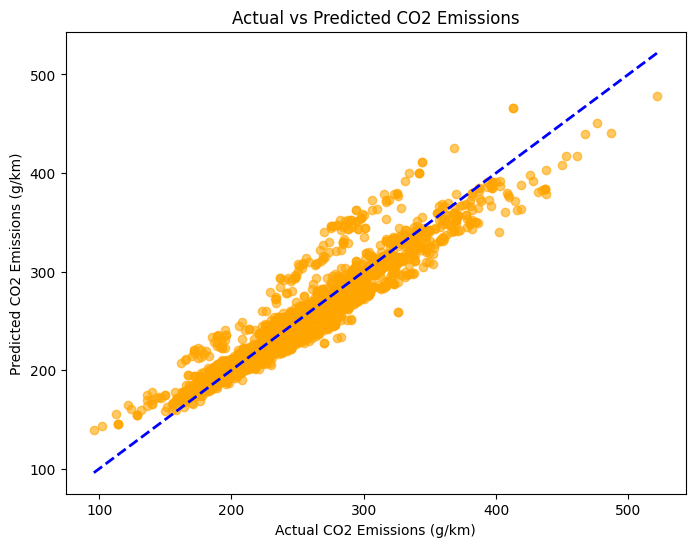

(LinearRegression(),
 array([234.92518311, 293.6966335 , 363.67038922, ..., 194.17720552,
        353.71814402, 258.65234403]),
 349.4373509314614,
 360.6903426035399,
 0.8913207326991059,
 0.8906223697464424)

In [23]:
run_basic_regression(model_cls=LinearRegression,
                         X_train=X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)

Training MSE: 19.238186580697164
Test MSE: 14.961842971321113
Training R²: 0.9940166899267785
Test R²: 0.9954628923064133


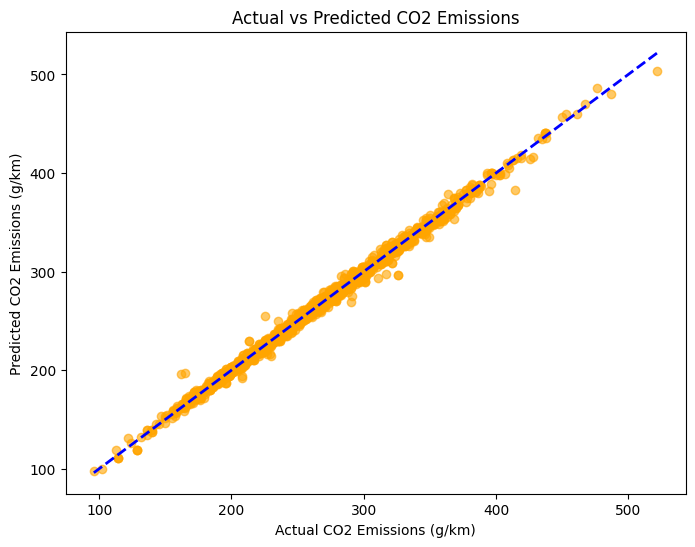

(KNeighborsRegressor(),
 array([252.6, 289.6, 415.4, ..., 173.4, 298. , 256.8]),
 19.238186580697164,
 14.961842971321113,
 0.9940166899267785,
 0.9954628923064133)

In [24]:
run_basic_regression(model_cls=KNeighborsRegressor,
                         X_train=X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)

Training MSE: 1.2019423895557282
Test MSE: 14.285926591788051
Training R²: 0.999626181294339
Test R²: 0.9956678607325409


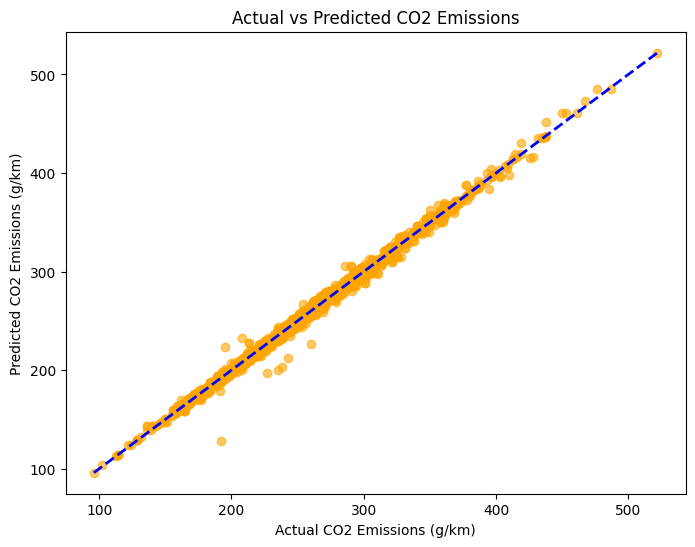

(DecisionTreeRegressor(),
 array([246., 290., 419., ..., 172., 315., 255.]),
 1.2019423895557282,
 14.285926591788051,
 0.999626181294339,
 0.9956678607325409)

In [25]:
run_basic_regression(model_cls=DecisionTreeRegressor,
                         X_train=X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)

Training MSE: 354.37742391516156
Test MSE: 365.811114381293
Training R²: 0.8897843099015705
Test R²: 0.8890695200691346


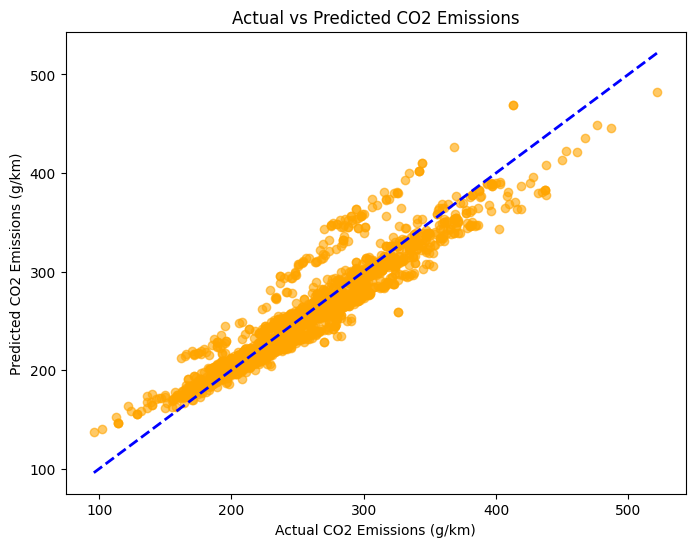

(Lasso(),
 array([231.1368039 , 291.97694101, 363.71503167, ..., 194.43496266,
        356.12791698, 259.29161738]),
 354.37742391516156,
 365.811114381293,
 0.8897843099015705,
 0.8890695200691346)

In [26]:
run_basic_regression(model_cls=Lasso,
                         X_train=X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)

Training MSE: 2.57766036690336
Test MSE: 12.660340042109747
Training R²: 0.9991983162667675
Test R²: 0.9961608121192969


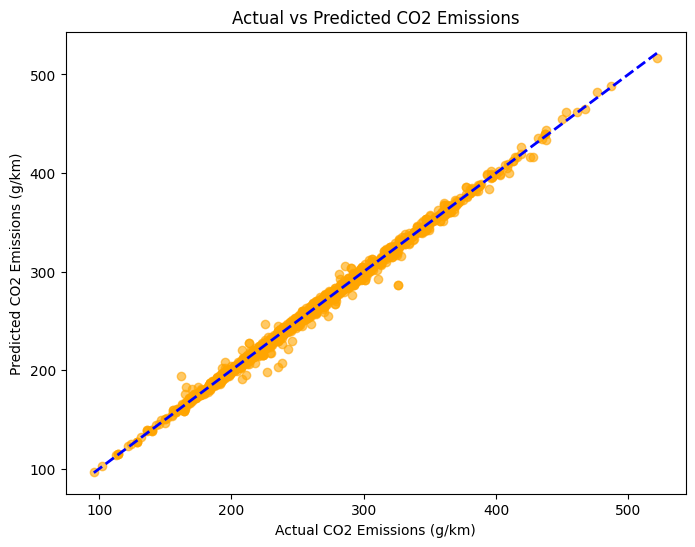

(RandomForestRegressor(),
 array([242.496     , 289.72166667, 418.8       , ..., 172.44      ,
        310.12      , 255.611     ]),
 2.57766036690336,
 12.660340042109747,
 0.9991983162667675,
 0.9961608121192969)

In [27]:
run_basic_regression(model_cls=RandomForestRegressor,
                         X_train=X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)

Training MSE: 225.21856725428822
Test MSE: 228.2431480072704
Training R²: 0.9299542856351551
Test R²: 0.9307863513327062


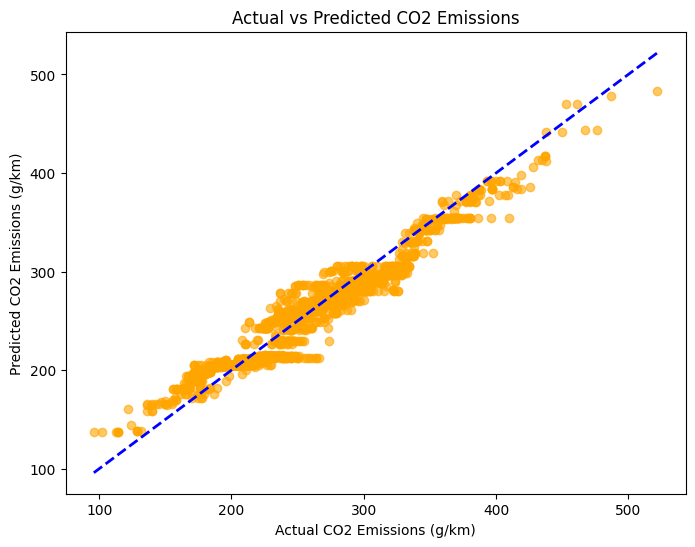

(AdaBoostRegressor(),
 array([242.74630262, 280.77493606, 383.29186603, ..., 198.41574279,
        305.99775785, 262.76666667]),
 225.21856725428822,
 228.2431480072704,
 0.9299542856351551,
 0.9307863513327062)

In [28]:
run_basic_regression(model_cls=AdaBoostRegressor,
                         X_train=X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)

After initializing the "shotgun approach" to test out different regression models, there were a number of issues we encountered. Our function was able to generally identify whether there is a risk of overfitting in the model. Unfortunately, every single model we fired off seems to be at risk of overfitting. Random Forest Regressor, K-Neighbor Regressors, and Decision Tree Regressors reached over 99% accuracy. So the model fitting aspect in the next section will mainly aim to combat the overfitting.

#Model Fitting

###Decision Tree Regressor

Now we engage in some techniques to combat overfitting before running our model again.



In [49]:
#first let's attempt to limit the depth
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [50]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"Training R²: {r2_train}")
print(f"Test R²: {r2_test}")

if mse_train < mse_test:
        print("Warning: Overfitting detected! Training error is lower than test error.")
if r2_train > r2_test:
        print("Warning: Overfitting detected! Training R² is higher than test R².")

Training MSE: 59.46861263039239
Test MSE: 63.14467011482408
Training R²: 0.9815045379927362
Test R²: 0.9808516792258737


Doesn't seem to have done too much limiting the depth.

In [31]:
#let's take a look at cross-validation scores
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.97622063 0.98236967 0.97934547 0.98044715 0.98174316]
Average cross-validation score: 0.9800252154841218


This is actually relatively good news. The cross-validation scores are relatively close to each other and display consistency. It suggests that the model is consistent and generalizes well to different subsets.

There is a possibility that the features are too overly correlated with the target, so what if we utilized regularization such as Ridge or Lasso to combat that?

In [32]:
X,y = df.drop(columns=['CO2 Emissions(g/km)', 'Number of Gears']), df['Fuel Consumption Comb (mpg)']

In [44]:
dtmodel = DecisionTreeRegressor()
dtmodel.fit(X_train, y_train)

DecisionTreeRegressor()

In [45]:
y_train_pred = dtmodel.predict(X_train)
y_test_pred = dtmodel.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"Training R²: {r2_train}")
print(f"Test R²: {r2_test}")


Training MSE: 1.2019423895557282
Test MSE: 11.916491550258511
Training R²: 0.999626181294339
Test R²: 0.9963863806352684


In [46]:
#define the Ridge model
ridge = Ridge()

#define a range of values for alpha (regularization strength)
param_grid = {'alpha': [0.1, 1, 10, 100, 1000, 10000]}

#dset up the grid search with cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

#fit the model
grid_search.fit(X_train, y_train)

#get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

#get the best model
best_ridge_model = grid_search.best_estimator_

#evaluate the model
y_pred = best_ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

Best alpha value: 1
Mean Squared Error on Test Set: 360.6602883401369


In [47]:
rmodel = Ridge(alpha=1, fit_intercept=True, copy_X=False)
rmodel.fit(X_train, y_train)

Ridge(alpha=1, copy_X=False)

In [48]:
y_train_pred = rmodel.predict(X_train)
y_test_pred = rmodel.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"Training R²: {r2_train}")
print(f"Test R²: {r2_test}")

Training MSE: 349.44145178861095
Test MSE: 360.6602883401369
Training R²: 0.8913194572826425
Test R²: 0.8906314835588232


###Create some data visualizations for our results

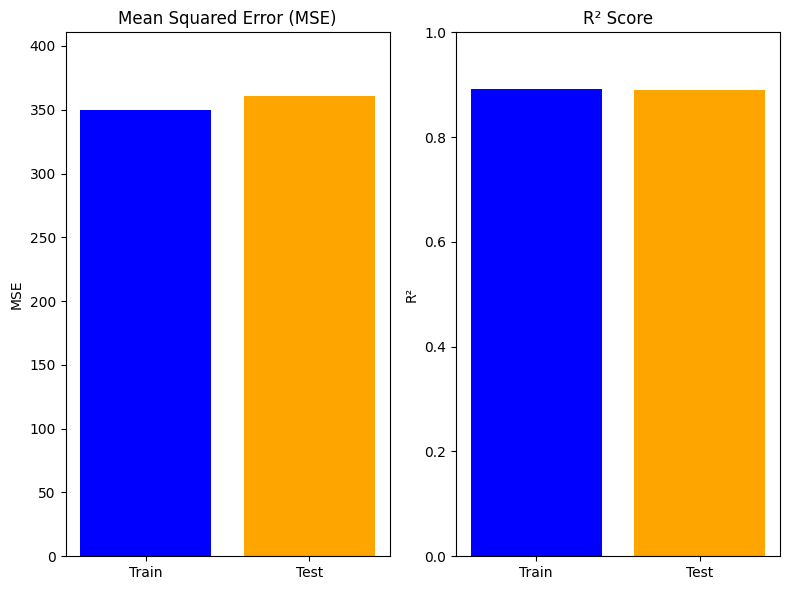

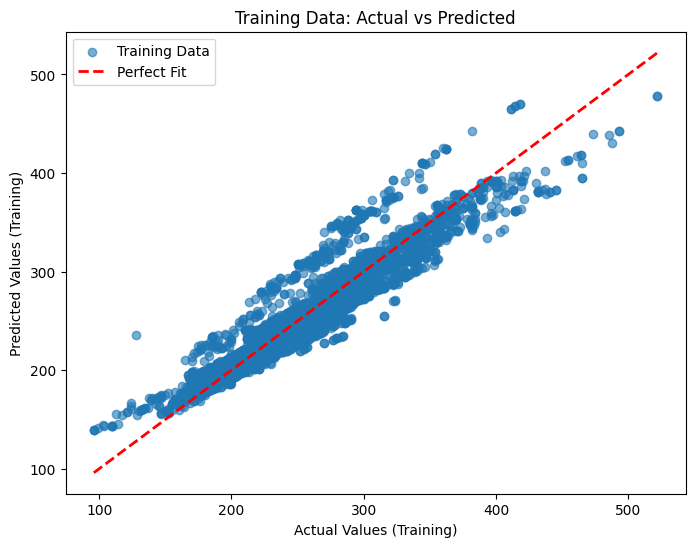

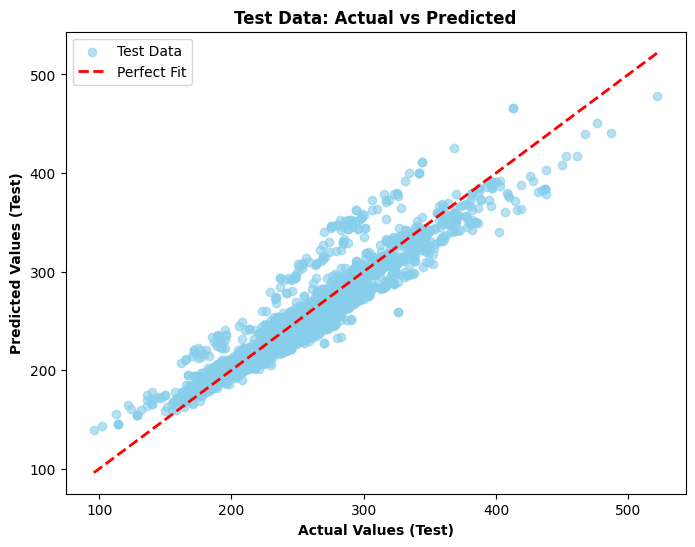

In [43]:
#training and test results
mse_train = 349.4414517886109
mse_test = 360.66028834013736
r2_train = 0.8913194572826425
r2_test = 0.8906314835588229

#bar Plot for MSE comparison (Training vs Test)
plt.figure(figsize=(8, 6))

#MSE Plot
plt.subplot(1, 2, 1)
plt.bar(['Train', 'Test'], [mse_train, mse_test], color=['blue', 'orange'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.ylim(0, max(mse_train, mse_test) + 50)

#bar plot for R² comparison (training vs test)
plt.subplot(1, 2, 2)
plt.bar(['Train', 'Test'], [r2_train, r2_test], color=['blue', 'orange'])
plt.title('R² Score')
plt.ylabel('R²')
plt.ylim(0, 1)

#adjust layout for proper display
plt.tight_layout()
plt.show()

#prediction vs actual plot for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, label='Training Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2, linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values (Training)')
plt.ylabel('Predicted Values (Training)')
plt.title('Training Data: Actual vs Predicted')
plt.legend()
plt.show()

#prediction vs actual plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, label='Test Data', color='skyblue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values (Test)', fontweight='bold', size=10)
plt.ylabel('Predicted Values (Test)', fontweight='bold', size=10)
plt.title('Test Data: Actual vs Predicted', fontweight='bold', size=12)
plt.legend()
plt.show()

#Summary of Modeling

After conducting many different base regression models and model fitting, our highest performing model was a Ridge regression.

While firing off multiple base regressions, I began to notice alarmingly high R² values already being displayed. With values as high as 0.99, I began to fear that models were falling vitctim to overfitting. Thus a majority of my model fitting section was dedicated to overcoming overfitting. Through cross-validation and regularization (Ridge regression), I was able to come to a predictive model with the R² value of 0.891.

The score indicates a relatively strong performing predictive model. While there may be questions as to why there isn't an even higher R² value, I believe combatting the potential correlation between features and creating a more robust model was more important. There may be other approaches worth looking into, such as more meticulous hyperparameter tuning or even feature engineering.

The predictive model could have many business use cases, as it can take in readily available information about a newly manufactured car and predict its CO2 emissions with relatively high accuracy. With an everchanging world of regulations, car manufacturers can use this model to get a sense of whether their new designs are likely to comply with new levels of CO2 emissions.